<a href="https://colab.research.google.com/github/GSP31/GSP31/blob/main/Pokemon_OHE_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  # Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

#2.1 Get the file
downloaded = drive.CreateFile({'id':'1Dk7m_zWk9l5vRsLEQUIV2E1XprGxnlS0'}) # replace the id with id of file you want to access
downloaded.GetContentFile('Pokemon.csv')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
poke_df = pd.read_csv('Pokemon.csv', encoding='utf-8')
poke_df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,Gen 1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,Gen 1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,Gen 1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,Gen 1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,Gen 1,False


In [ ]:
poke_df.shape

(800, 13)

In [ ]:
poke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    object
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(4)
memory usage: 75.9+ KB


## Drop some features

In [ ]:
poke_df.drop(['#', 'Name','Type 2'], axis=1,inplace=True)
#poke_df.drop(['#', 'Name','Type 2'], axis=1)
poke_df.shape

(800, 10)

In [ ]:
#Or
#poke_df.drop(columns=['#', 'Name','Type 2'], inplace=True)
#poke_df.shape

In [ ]:
poke_df.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,Gen 1,False
1,Grass,405,60,62,63,80,80,60,Gen 1,False
2,Grass,525,80,82,83,100,100,80,Gen 1,False
3,Grass,625,80,100,123,122,120,80,Gen 1,False
4,Fire,309,39,52,43,60,50,65,Gen 1,False


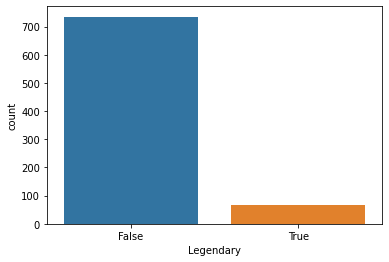

In [ ]:
#Visualisatiomn
import seaborn as sns
sns.countplot(poke_df['Legendary'],label="Count")
plt.show()

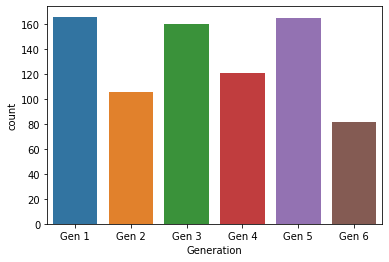

In [ ]:
sns.countplot(poke_df['Generation'],label="Count")
plt.show()

In [ ]:
poke_df.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Grass,318,45,49,49,65,65,45,Gen 1,False
1,Grass,405,60,62,63,80,80,60,Gen 1,False
2,Grass,525,80,82,83,100,100,80,Gen 1,False
3,Grass,625,80,100,123,122,120,80,Gen 1,False
4,Fire,309,39,52,43,60,50,65,Gen 1,False


##Label Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

le = LabelEncoder()

In [ ]:
poke_df['Type 1']= le.fit_transform(poke_df['Type 1'])
#poke_df['Generation']= le.fit_transform(poke_df['Generation'])

poke_df.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,9,318,45,49,49,65,65,45,Gen 1,False
1,9,405,60,62,63,80,80,60,Gen 1,False
2,9,525,80,82,83,100,100,80,Gen 1,False
3,9,625,80,100,123,122,120,80,Gen 1,False
4,6,309,39,52,43,60,50,65,Gen 1,False


## One Hot encoding

In [ ]:
poke_df = pd.get_dummies(poke_df, columns = ['Generation'])
poke_df.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Generation_Gen 1,Generation_Gen 2,Generation_Gen 3,Generation_Gen 4,Generation_Gen 5,Generation_Gen 6
0,9,318,45,49,49,65,65,45,False,1,0,0,0,0,0
1,9,405,60,62,63,80,80,60,False,1,0,0,0,0,0
2,9,525,80,82,83,100,100,80,False,1,0,0,0,0,0
3,9,625,80,100,123,122,120,80,False,1,0,0,0,0,0
4,6,309,39,52,43,60,50,65,False,1,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

## Scale features except OHE and dependent feature

In [ ]:
sub_vars = ['Type 1',	'Total',	'HP',	'Attack',	'Defense',	'Sp. Atk',	'Sp. Def',	'Speed']

poke_df[sub_vars] = scaler.fit_transform(poke_df[sub_vars]) #output in pandas frame

#poke_df = scaler.fit_transform(poke_df[sub_vars]) #output in numpy array

poke_df[sub_vars].head()

#poke_df[:5]

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,0.529412,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571
1,0.529412,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286
2,0.529412,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571
3,0.529412,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571
4,0.352941,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857


In [ ]:
ohe_df = poke_df.drop(['Type 1',	'Total',	'HP',	'Attack',	'Defense',	'Sp. Atk',	'Sp. Def',	'Speed'], axis=1)
ohe_df.head()

,Legendary,Generation_Gen 1,Generation_Gen 2,Generation_Gen 3,Generation_Gen 4,Generation_Gen 5,Generation_Gen 6
0,False,1,0,0,0,0,0
1,False,1,0,0,0,0,0
2,False,1,0,0,0,0,0
3,False,1,0,0,0,0,0
4,False,1,0,0,0,0,0


In [ ]:
poke_df_final = pd.concat([poke_df[sub_vars], ohe_df], axis=1)
poke_df_final.head()

,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,Generation_Gen 1,Generation_Gen 2,Generation_Gen 3,Generation_Gen 4,Generation_Gen 5,Generation_Gen 6
0,0.529412,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,False,1,0,0,0,0,0
1,0.529412,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,False,1,0,0,0,0,0
2,0.529412,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,False,1,0,0,0,0,0
3,0.529412,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,False,1,0,0,0,0,0
4,0.352941,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,False,1,0,0,0,0,0


In [ ]:
for col in poke_df_final.columns:
    print(col)

Type 1
Total
HP
Attack
Defense
Sp. Atk
Sp. Def
Speed
Legendary
Generation_Gen 1
Generation_Gen 2
Generation_Gen 3
Generation_Gen 4
Generation_Gen 5
Generation_Gen 6


In [ ]:
poke_df_final.shape

(800, 15)

In [ ]:
#Define X and y
X = poke_df_final.drop('Legendary', axis=1)
y = poke_df_final['Legendary']


## Data Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(640, 14)
(160, 14)
(640,)
(160,)


## Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predictions = lr.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
results = confusion_matrix(y_test,y_predictions)
print ("Confusion Matrix of test data:")
print(results)

Confusion Matrix of test data:
[[151   2]
 [  3   4]]


In [ ]:
rep = classification_report(y_test, y_predictions)
print ("Report of test data:")
print(rep)

Report of test data:
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       153
        True       0.67      0.57      0.62         7

    accuracy                           0.97       160
   macro avg       0.82      0.78      0.80       160
weighted avg       0.97      0.97      0.97       160



# SMOTE

In [ ]:
smote = SMOTE()

In [ ]:
#X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [ ]:
print("Before SMOTE :" , Counter(y_train))
print("After SMOTE :" , Counter(y_train_smote))


Before SMOTE : Counter({False: 582, True: 58})
After SMOTE : Counter({False: 582, True: 582})


In [ ]:
# shape increased major class * 3
print('Shape of train data',X_train_smote.shape)

Shape of train data (1164, 14)


In [ ]:
lg = LogisticRegression()

In [ ]:
lg.fit(X_train_smote,y_train_smote)

LogisticRegression()

In [ ]:
y_pred_smote = lg.predict(X_test)

In [ ]:
results = confusion_matrix(y_test,y_pred_smote)
print ("Confusion Matrix of test data after SMOTE:")
print(results)

Confusion Matrix of test data after SMOTE:
[[142  11]
 [  0   7]]


In [ ]:
rep = classification_report(y_test, y_pred_smote)
print ("Report of test data after SMOTE:")
print(rep)

Report of test data after SMOTE:
              precision    recall  f1-score   support

       False       1.00      0.93      0.96       153
        True       0.39      1.00      0.56         7

    accuracy                           0.93       160
   macro avg       0.69      0.96      0.76       160
weighted avg       0.97      0.93      0.95       160

